# Transformation

* Transformations of the response and predictors can improve the fit and correct violations of model assumptions such as nonconstant error variance
* We may also consider adding additional predictors that are functions of the existing predictor like quadratic or cross product terms, thus we have more choice transforming the predictors than on the response

## Transforming the Response

Suppose you log transform the response

<p>&nbsp;</p>
\begin{split}
log \:  y= \beta_0 + \beta_1x + \epsilon
\end{split}
<p>&nbsp;</p>

Then, the original scale of the response becomes

<p>&nbsp;</p>
\begin{split}
y= exp(\beta_0 + \beta_1x ).exp(\epsilon)
\end{split}
<p>&nbsp;</p>

* In this model, errors are multiplicatively not additively to the rest of the equation. 
* Use of standard regression methods for the logged response model requires that we believe the errors enter multiplicatively in the original scale

Iff we believe the true model for y is 
<p>&nbsp;</p>
\begin{split}
y= exp(\beta_0 + \beta_1x ) + \epsilon
\end{split}
<p>&nbsp;</p>

Then, linearization is not possible and nonlinear methods must be implemented
* As a practical matter, we usually do not know how the errors enter the model
* The typical approach is to try different transformations and check the residuals to see whether they satisfy the conditions required for linear regression

Another practical problem is that you will need to express prediction in the original scale. So the prediction should be transformed $exp(\hat y_0)$ and the confidence inferval $CI[exp\:l, exp\:u]$ and the interval will not be symmetric

Regression coefficient will need to be interpreted with respect to the transformed scale. We canno directly compare regression coefficients for models where the response transformation is different

<p>&nbsp;</p>
\begin{split}
log \hat y = \hat \beta_0 + \hat \beta_1 x_1 + ... +\hat \beta_p x_p \\
\\
\hat y = e^{\hat \beta_0} e^{\hat \beta_1 x_1}... e^{\hat \beta_p x_p} 
\end{split}
<p>&nbsp;</p>

An increase of $x_1$ would multiply the predictor response (inte original scale) by $e^{\hat \beta_1}$. Thus the residuals are multiplicative rather than additive

##### Box-Cox 
Is a popular method to determine a transformation on the response. The method transforms the response $y \rightarrow g_{\lambda}(y)$ where the family of transformations indexes by $\lambda$ is 

* We can adjust the relationship between $x$ and $y$ by adding a $\lambda$ parameter such as $y^{\lambda} = \beta x + \epsilon$

*  If we know the suppose the relation between $x$ and $y$ such as quadratic (2) or cubic (3), and can plug the values and test the fit. However, often times we do not know and have to using maximum likelihood to find  $\lambda$ assuming normality of the errors

\begin{split}
y^{\lambda}=
\begin{cases}
 \frac{y^{\lambda}-1}{\lambda} \text{ if $\lambda$ $\neq$ 0} \\      
  log \: y \text{ if $\lambda$ = 0}
\end{cases}
\end{split}

The condition means that if $\lambda$ is close to 1, than there is no need for any transformation. However, if $\lambda$ is close to 0, than we should use $log \:y$

The explicite model for the ML is

<p>&nbsp;</p>
\begin{split}
L(\lambda) = - \frac{n}{2}log(RSS_{ \lambda /n}) + (\lambda -1)\sum log_{yi}
\end{split}
<p>&nbsp;</p>

* Box-cox transformation works best for small transformation (i.e., -5 to 5) and to not be used if $\lambda$ is too high 
* We can sometimes round to 0.5 (i.e., sqrt) if within the CI, so it  is easier to interpret 


In [27]:
library(MASS)
library(car)
library(faraway)

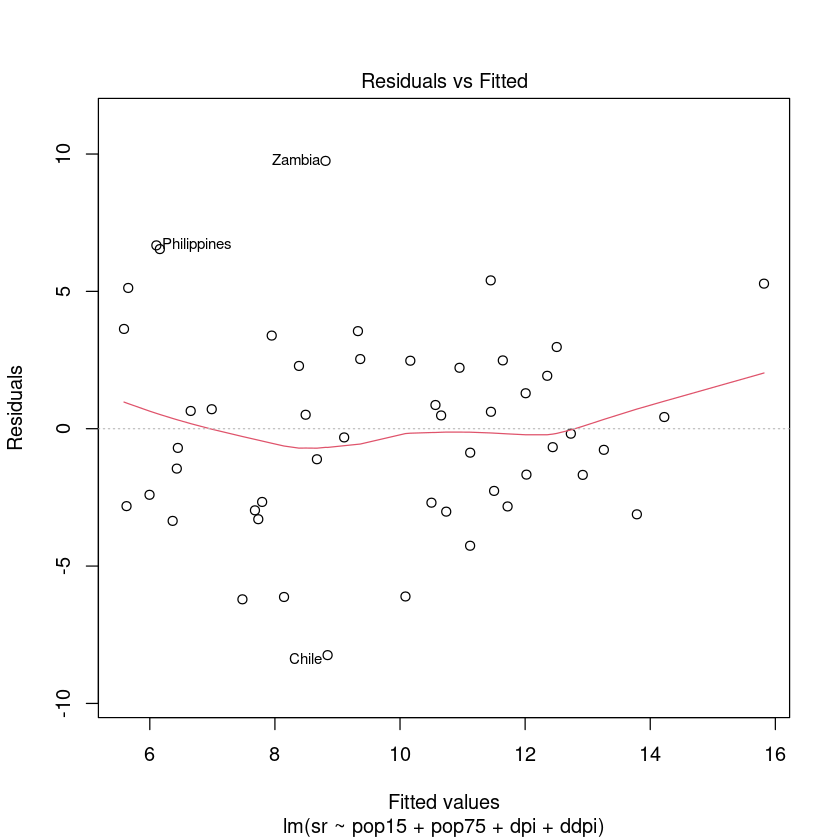

In [28]:
data(savings)
g = lm(sr ~ pop15 + pop75 + dpi + ddpi, savings)


#Homogeneity of variances
plot(g, which = 1)

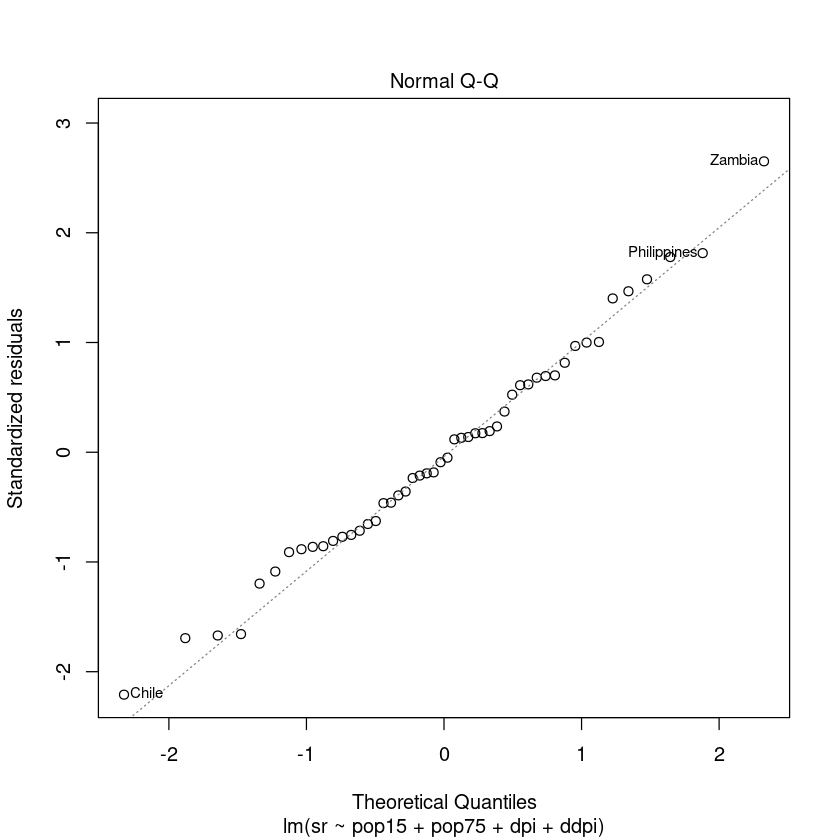

In [29]:
# 2. Normality
plot(g, which = 2)

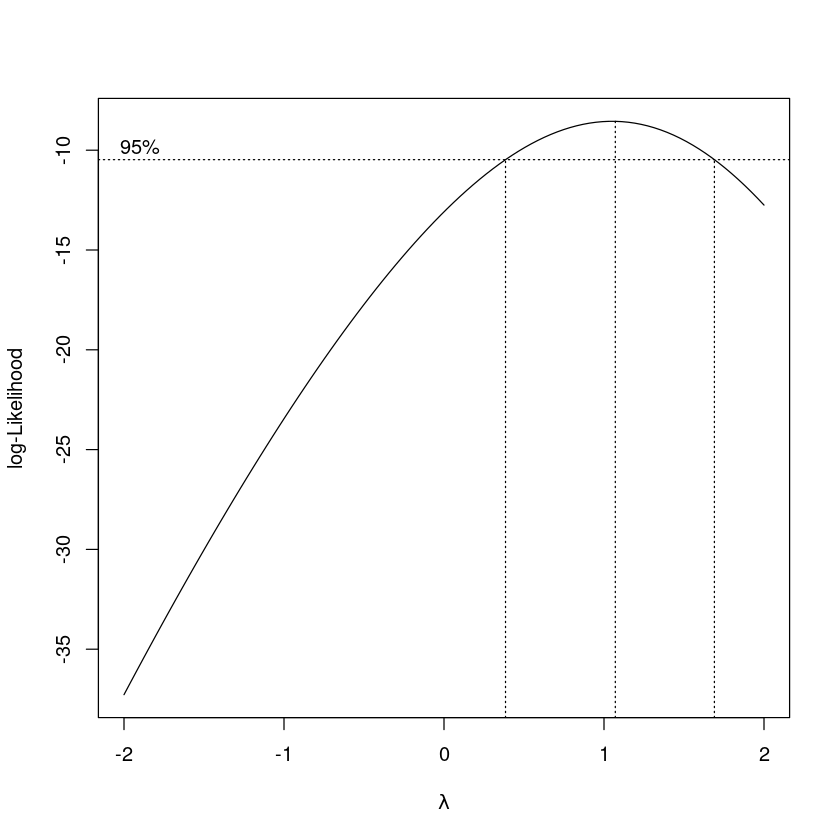

[1] 1.056

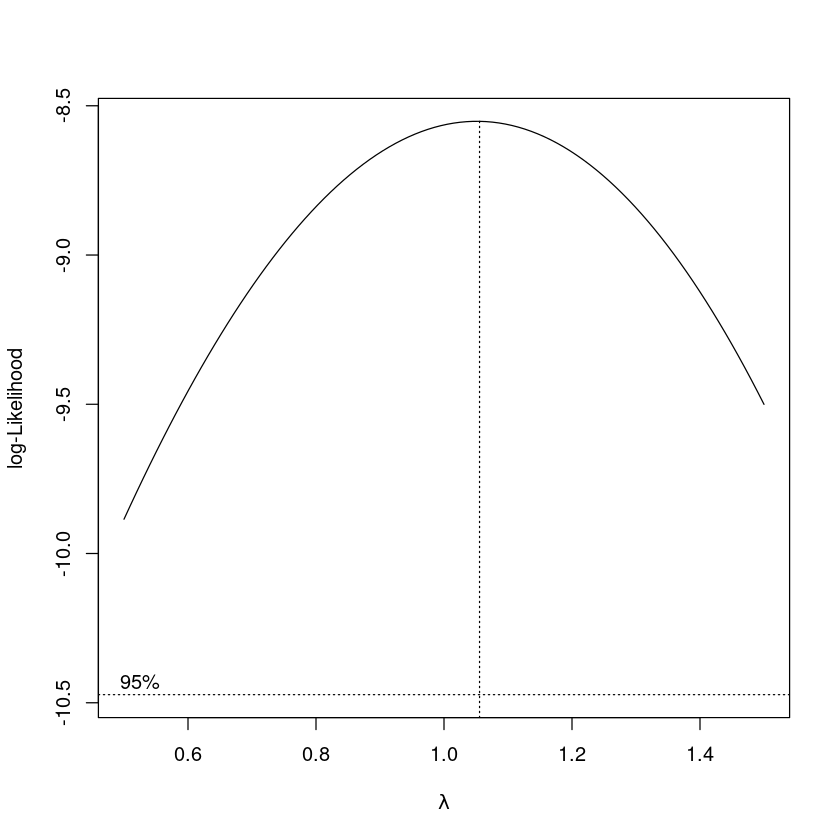

In [19]:
boxcox(g, plotit = TRUE)

# narrowing the range of lambda so we can see the CI
bc = boxcox(g, plotit = TRUE, lambda = seq(0.5, 1.5, by = 0.1))
b.lamdda = bc$x[which(bc$y==max(bc$y))]
round(b.lamdda, 3) 

* CI spans from 0.6 to 1.4. There is no good reason to transform this data.
* Let's now consider Galapagos dataset

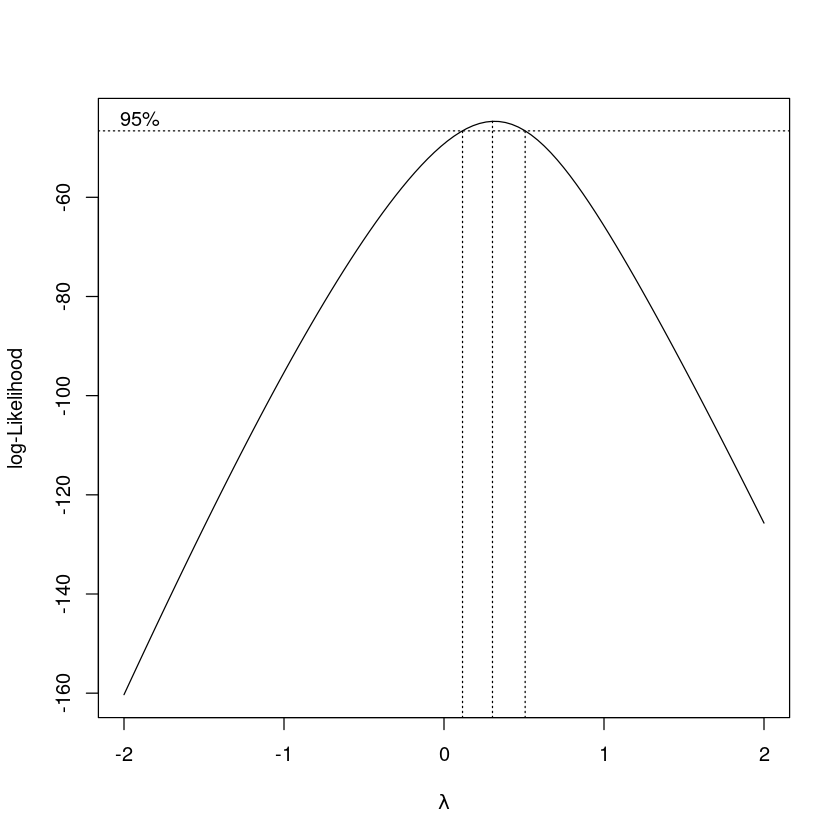

[1] 0.313

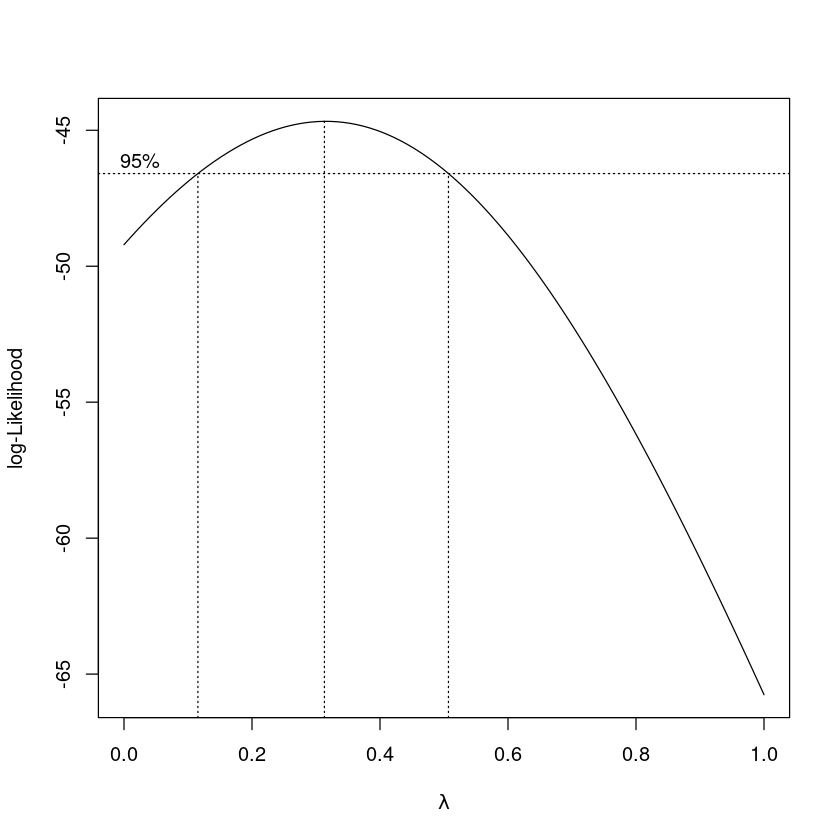

In [10]:
data(gala)
g = lm(Species ~ Area + Elevation + Nearest + Scruz + Adjacent, data = gala)
boxcox(g, plotit = T)
bc = boxcox(g, lambda = seq(0.0, 1.0, by = 0.05), plotit = TRUE)
b.lamdda = bc$x[which(bc$y==max(bc$y))]
round(b.lamdda, 3) 

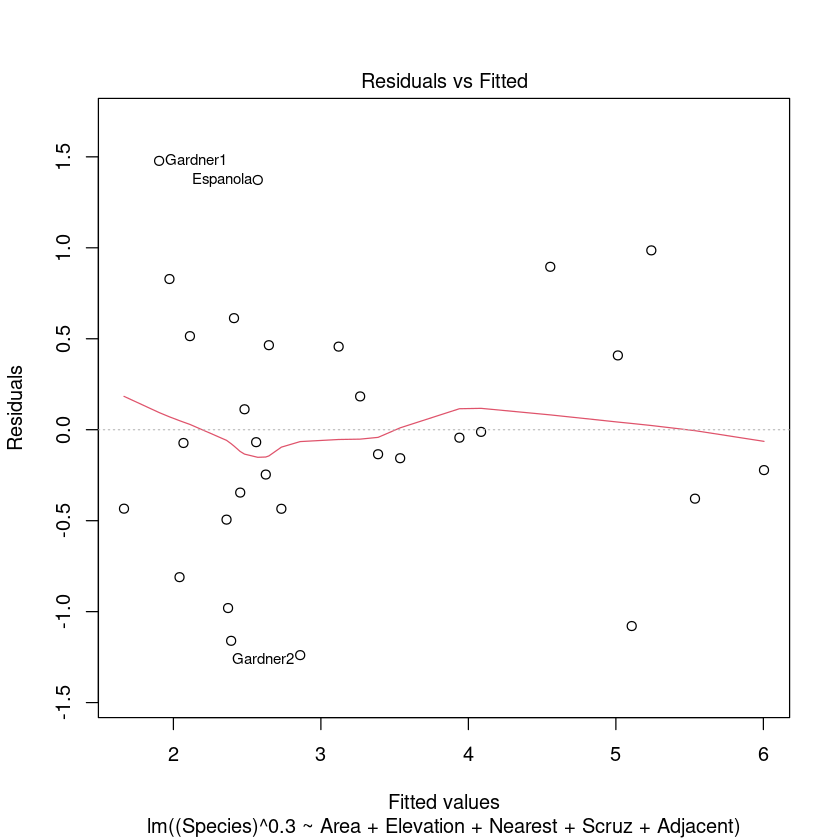

In [30]:
library(car)
g = lm((Species)^0.3 ~ Area + Elevation + Nearest + Scruz + Adjacent, data = gala)
#qqp(g)
plot(g, which =1)

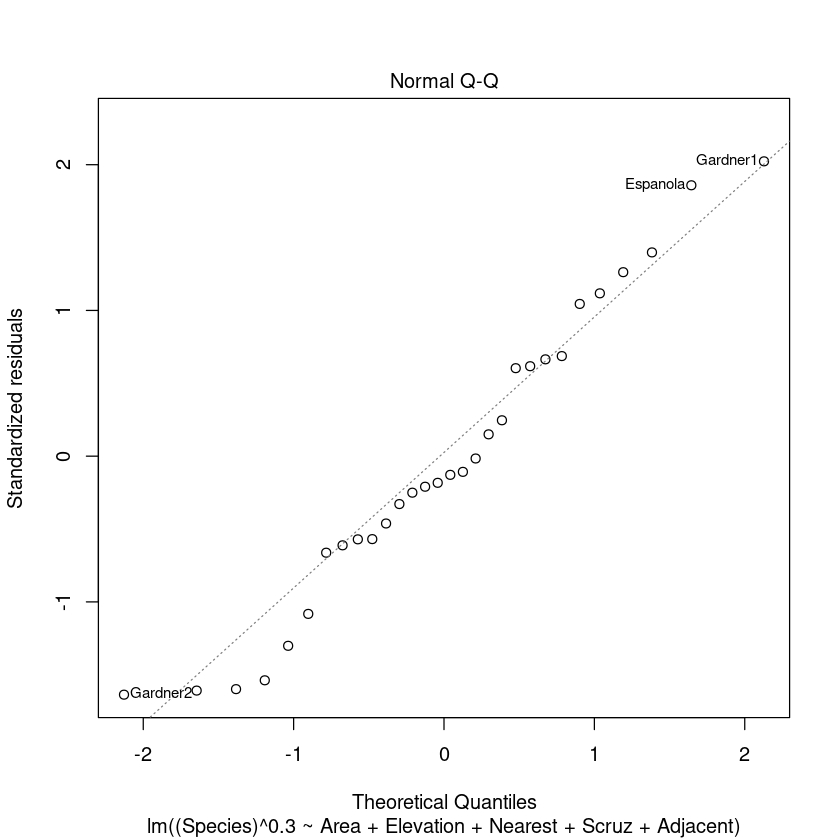

In [31]:
plot(g, which = 2)

* Strong outliers can upset box-cox transformations
* If the reponse is proportions (or percentages), the logit transformation $log(y/(y-1))$ 

## Transforming the Predictors

* We can take a Box-Cox approach that also works for predictors chosing a transformation that minimize the RSS, but if we have many predictors, this can be laborious

* We can use a graphical method to inspect the residuals and decide for which transformation would be best

* We can also use method such as the ones that replace $x$ with more than one term $f(x) + g(x) + ... $ that allow flexibility

### Broken Stick Regression (Piecewise Regression)

Sometimes we might want to use different linear regression models in different regions of the data  (i.e., structure within data)


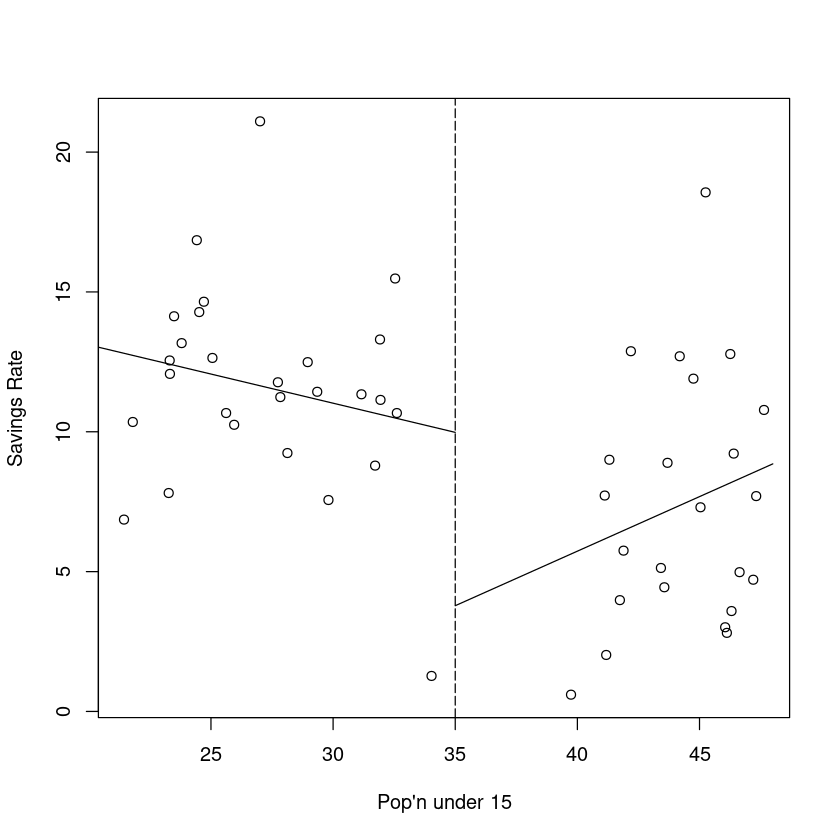

In [36]:
# First model adjusted to pop15 below 35%
g1 = lm(sr ~ pop15, data = savings, subset = pop15 < 35)

# Second model adjusted to pop15 above 35%
g2 = lm(sr ~ pop15, data = savings, subset = pop15 > 35)

plot(sr ~ pop15, savings, xlab = "Pop'n under 15", ylab = "Savings Rate")
abline(v=35, lty = 5)

segments(20, g1$coef[1] + g1$coef[2]*20, 35, g1$coef[1] + g1$coef[2]*35)


segments(48, g2$coef[1] + g2$coef[2]*48, 35, g2$coef[1] + g2$coef[2]*35)


* One objection to this approach is that the two parts are discontinuous. If we believe the two parts should be continuous we should consider broken stick regression

\begin{split}
B_l(x)=
\begin{cases}
 c - x\:  \text{ if x < c} \\      
 0\:  \text{ otherwise}
\end{cases}
\end{split}

and 

\begin{split}
B_r(x)=
\begin{cases}
 x - c\:  \text{ if x > c} \\      
 0\:  \text{ otherwise}
\end{cases}
\end{split}

where $c$ marks the division between the two groups. Sometimes $B_l$ and $B_r$ are called hockey-stick function because of their shape

<p>&nbsp;</p>
\begin{split}
y = \beta_0 + \beta_1 B_l(x) + \beta_2 B_r(x) + \epsilon
\end{split}
<p>&nbsp;</p>

* now if we use standard regression, the two parts are guaranteed to meet at $c$.
* This model is more economical than the subsetted model give that it only used three parameters instead of four

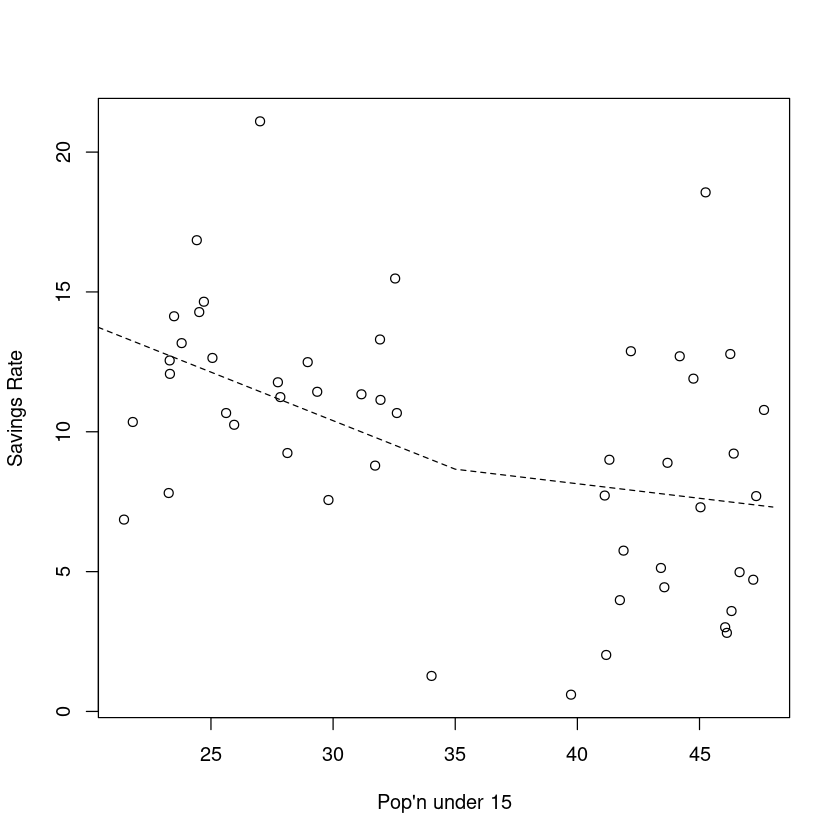

In [38]:
lhs = function(x) ifelse(x < 35, 35 - x, 0)
rhs = function(x) ifelse(x < 35, 0,  x-35)

gb = lm(sr ~lhs(pop15) + rhs(pop15), data = savings)

x = seq(20, 48, by = 1)
py = gb$coef[1] +gb$coef[2] * lhs(x) + gb$coef[3] * rhs(x)


plot(sr ~ pop15, savings, xlab = "Pop'n under 15", ylab = "Savings Rate")
lines(x, py, lty = 2)

* Broken stick regression is also called segmented regression

### Polynomials

Another way to generalize the $X\beta$ part of the model is to add polynomial terms. In case of one predictor:

<p>&nbsp;</p>
\begin{split}
y = \beta_0 + \beta_1 x + ... + \beta_d x^d + \epsilon
\end{split}
<p>&nbsp;</p>

which allows for a more flexible relationship, although we usually do not believe it exactly represents any underlying reality

##### Chosing *d*

* Keeping adding term until the added term is not significant anymore
* Start adding the largest *d* and eliminate nonstatistically significant terms starting at the highest order term
* Do not eliminate lower order terms

In [39]:
summary(lm(sr ~ ddpi, data = savings))


Call:
lm(formula = sr ~ ddpi, data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5535 -3.7349  0.9835  2.7720  9.3104 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.8830     1.0110   7.797 4.46e-10 ***
ddpi          0.4758     0.2146   2.217   0.0314 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.311 on 48 degrees of freedom
Multiple R-squared:  0.0929,	Adjusted R-squared:  0.074 
F-statistic: 4.916 on 1 and 48 DF,  p-value: 0.03139


In [40]:
#quadratic term
summary(lm(sr ~ ddpi + I(ddpi^2), data = savings))


Call:
lm(formula = sr ~ ddpi + I(ddpi^2), data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5601 -2.5612  0.5546  2.5735  7.8080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.13038    1.43472   3.576 0.000821 ***
ddpi         1.75752    0.53772   3.268 0.002026 ** 
I(ddpi^2)   -0.09299    0.03612  -2.574 0.013262 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.079 on 47 degrees of freedom
Multiple R-squared:  0.205,	Adjusted R-squared:  0.1711 
F-statistic: 6.059 on 2 and 47 DF,  p-value: 0.004559


In [41]:
# cubic term
summary(lm(sr ~ ddpi + I(ddpi^2) + I(ddpi^3), data = savings))


Call:
lm(formula = sr ~ ddpi + I(ddpi^2) + I(ddpi^3), data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5571 -2.5575  0.5616  2.5756  7.7984 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  5.145e+00  2.199e+00   2.340   0.0237 *
ddpi         1.746e+00  1.380e+00   1.265   0.2123  
I(ddpi^2)   -9.097e-02  2.256e-01  -0.403   0.6886  
I(ddpi^3)   -8.497e-05  9.374e-03  -0.009   0.9928  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.123 on 46 degrees of freedom
Multiple R-squared:  0.205,	Adjusted R-squared:  0.1531 
F-statistic: 3.953 on 3 and 46 DF,  p-value: 0.01369


* In this case, cubic was not significant anymore, so we should stop at the quadratic
* If we started at the 4th we would have reached the same point by gradually decreasing 

#####  Orthogonal polynomials 

<p>&nbsp;</p>
\begin{split}
z_1 = a_1 + b_1x  \\
z_2 = a_2 + b_2x + c_2x^2  \\
z_3 = a_3 + b_3x + c_3x^3 + d_3x^3 
\end{split}
<p>&nbsp;</p>

* where the coefficients a,b,c ... are chosen so that $z_i^Tz_j = 0$ when $ i \neq j$. The $z$ is called orthogonal polynomials
*  Not a very popular method anymore, but it worth knowing

In [44]:
g = lm(sr ~ poly(ddpi, 4), savings)
summary(g)


Call:
lm(formula = sr ~ poly(ddpi, 4), data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9599 -2.5617  0.3906  2.5357  7.8035 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.67100    0.58460  16.543   <2e-16 ***
poly(ddpi, 4)1   9.55899    4.13376   2.312   0.0254 *  
poly(ddpi, 4)2 -10.49988    4.13376  -2.540   0.0146 *  
poly(ddpi, 4)3  -0.03737    4.13376  -0.009   0.9928    
poly(ddpi, 4)4   3.61197    4.13376   0.874   0.3869    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.134 on 45 degrees of freedom
Multiple R-squared:  0.2182,	Adjusted R-squared:  0.1488 
F-statistic: 3.141 on 4 and 45 DF,  p-value: 0.02321


#####  Response surface

We can define polynomials in more than one variable. That is called response surface

<p>&nbsp;</p>
\begin{split}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_11 x_1^2 + \beta_22 x_2^2 + \beta_12 x_1x_2    
\end{split}
<p>&nbsp;</p>


In [46]:
g = lm(sr ~ polym(pop15, ddpi, degree = 2), savings)
summary(g)


Call:
lm(formula = sr ~ polym(pop15, ddpi, degree = 2), data = savings)

Residuals:
   Min     1Q Median     3Q    Max 
-7.266 -2.623 -0.045  2.575 10.045 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         9.6197     0.5343  18.006  < 2e-16 ***
polym(pop15, ddpi, degree = 2)1.0 -12.8796     4.0197  -3.204  0.00252 ** 
polym(pop15, ddpi, degree = 2)2.0   2.0302     3.7887   0.536  0.59476    
polym(pop15, ddpi, degree = 2)0.1  12.6814     4.5824   2.767  0.00823 ** 
polym(pop15, ddpi, degree = 2)1.1 -53.6166    39.1494  -1.370  0.17778    
polym(pop15, ddpi, degree = 2)0.2  -4.0289     4.4857  -0.898  0.37399    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.768 on 44 degrees of freedom
Multiple R-squared:  0.3647,	Adjusted R-squared:  0.2925 
F-statistic: 5.053 on 5 and 44 DF,  p-value: 0.0009598


### Regression Splines

* Polynomials have the advantage off smoothness, but the disadvantage that each data point affects the fit globally
* In contrast, piecewise regression localizes the influence of each data point to its particular segment, but it does not have same smoothness 
* B-spline functions combines the smoothness and local influence 

Suppose the true relation

<p>&nbsp;</p>
\begin{split}
y = sin^3(2\pi x^3) + epsilon    
\end{split}
<p>&nbsp;</p>

which the residuals are 

<p>&nbsp;</p>
\begin{split}
\epsilon \sim N(0,(0.1)^2)   
\end{split}
<p>&nbsp;</p>

Lets simulate some data and check of well the B-Spline will do


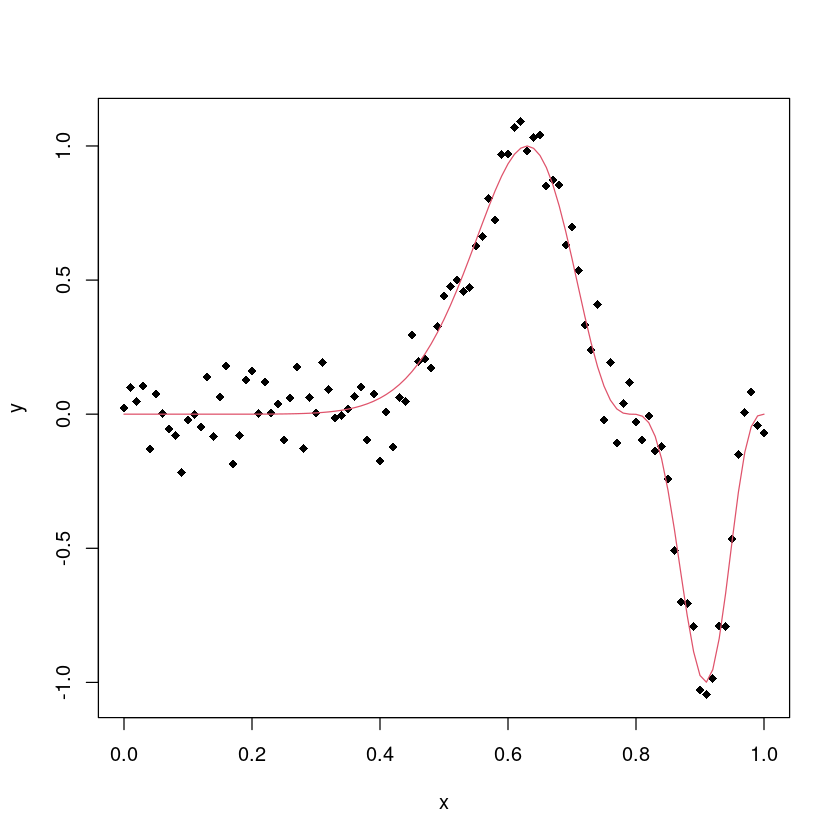

In [2]:
funky = function(x)  sin(2*pi*x^3)^3
x = seq(0, 1, by = 0.01)
y = funky(x) + 0.1*rnorm(101)

# Real data
matplot(x, cbind(y, funky(x)), type="pl", ylab="y", pch=18, lty=1)

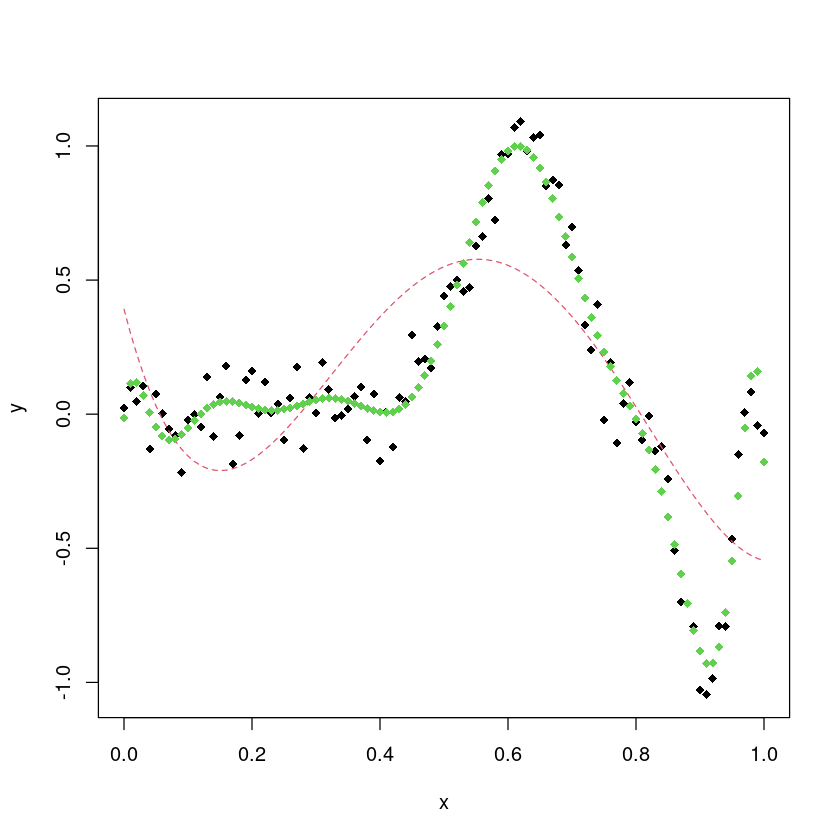

In [3]:
# first let's check the polynomial of order 4 and 12
g4 = lm(y ~ poly(x,4))
g12 = lm(y ~ poly(x, 12))
matplot(x, cbind(y, g4$fit, g12$fit), type = "pl", ylab="y", pch=18, lty=c(1,2))

In [4]:
library(splines)

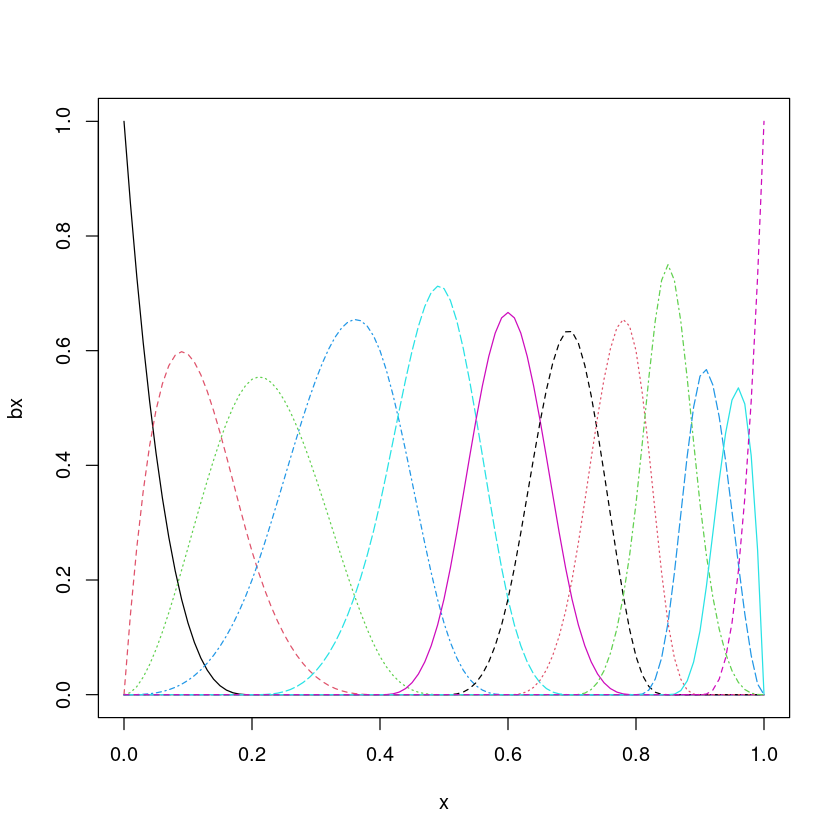

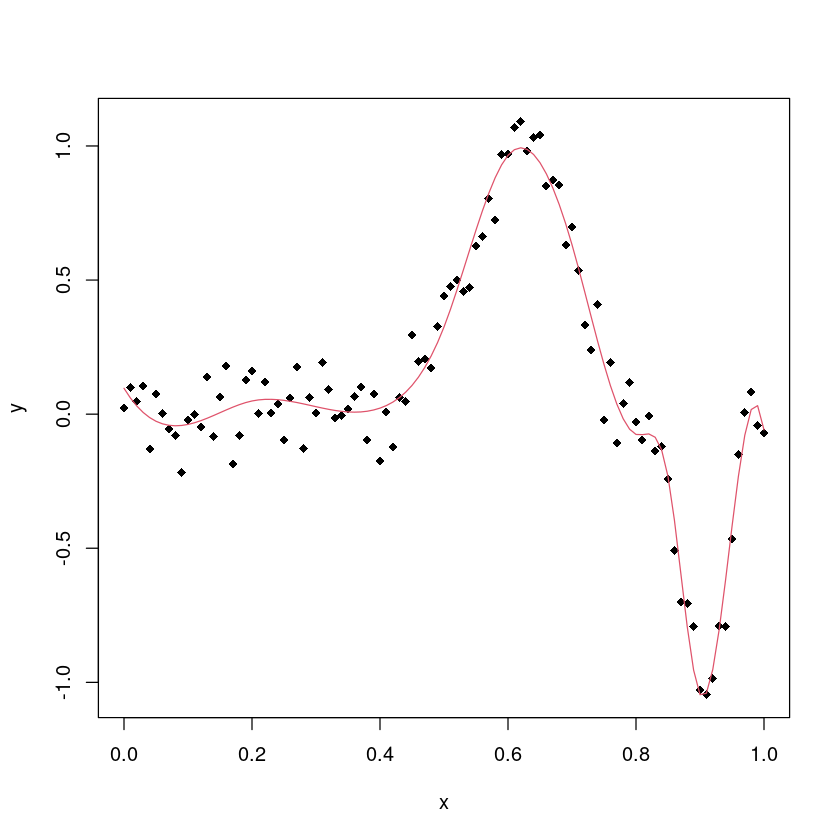

In [5]:
# Let's use 12 basis functions for comparability
knots = c (0, 0, 0, 0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 1, 1, 1, 1)

bx = splineDesign(knots, x)
gs = lm(y ~ bx)

matplot(x, bx, type = "l")
matplot(x, cbind(y, gs$fit), type = "pl", ylab="y", pch = 18, lty = 1)

* Regression splines are useful for fitting functions with some flexibility provided we have enough data
* We have to be careful not to use too much degrees of freedom

### Overview

There is an recent approach called additive model, where nonparametric regression techniques are used to estimate the $f_is$. Other techniques include ACE, AVAS, regression trees, MARS, and neural networks

* For big data, complex model are justified
* For smaller sets, standard regression is more effective. 

Simple regressions are easier to interpret the parameters, complex regression such as neural network are usually good for prediction purposes